In [1]:
!ls

FB-prep.ipynb         sample_submission.csv train.csv
House_prices.ipynb    submission1.csv
data_description.txt  test.csv


1. EDA
2. Data preprocessing and cleaning
3. Data Transformation and Feat Engg
4. ML 
5. Hyperparam Tuning 
6. presentation 

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [22]:
import warnings
warnings.filterwarnings('ignore')

In [39]:
pd.set_option('display.max_rows', 100)

## Data Load 

In [3]:
housing = pd.read_csv('train.csv')
housing.shape, housing.columns

((1460, 81),
 Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
        'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
        'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
        'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
        'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
        'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
        'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
        'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
        'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
        'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
        'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
        'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
        'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
      

## EDA 

In [4]:
housing.drop('Id', axis=1).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

### Numeric vs Categorical

In [5]:
housing.describe().round(decimals=2).transpose()

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.50,421.61,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.90,42.30,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.05,24.28,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.83,9981.26,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.10,1.38,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.58,1.11,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.27,30.20,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.87,20.65,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.69,181.07,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.64,456.10,0.0,0.00,383.5,712.25,5644.0


In [6]:
housing.describe().shape, housing.select_dtypes(exclude=['object']).describe().shape 

((8, 38), (8, 38))

In [7]:
housing.select_dtypes(include=['object']).describe().shape

(4, 43)

In [9]:
housing.select_dtypes(include=['object']).describe().transpose()

,count,unique,top,freq
MSZoning,1460,5,RL,1151
Street,1460,2,Pave,1454
Alley,91,2,Grvl,50
LotShape,1460,4,Reg,925
LandContour,1460,4,Lvl,1311
Utilities,1460,2,AllPub,1459
LotConfig,1460,5,Inside,1052
LandSlope,1460,3,Gtl,1382
Neighborhood,1460,25,NAmes,225
Condition1,1460,9,Norm,1260


### Y

In [17]:
housing['SalePrice'].describe(percentiles=[0.1, 0.2, 0.4, 0.5, 0.6, 0.75, 0.8, 0.9, 0.95, 0.99])

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
10%      106475.000000
20%      124000.000000
40%      147000.000000
50%      163000.000000
60%      179280.000000
75%      214000.000000
80%      230000.000000
90%      278000.000000
95%      326100.000000
99%      442567.010000
max      755000.000000
Name: SalePrice, dtype: float64

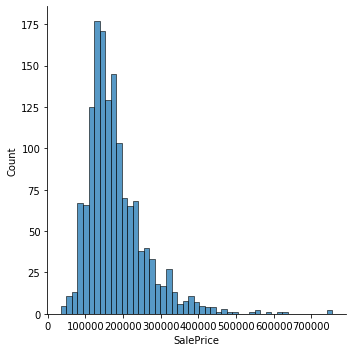

In [13]:
# Get the distribution plot
sns.displot(housing['SalePrice'])

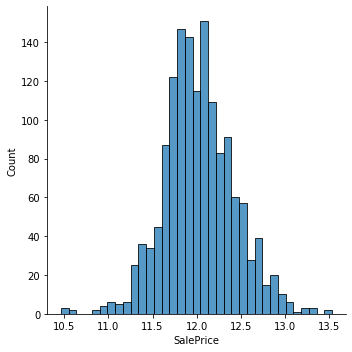

In [21]:
# logtransform 
sns.displot(np.log(housing['SalePrice']))

### Numeric Feats Explore

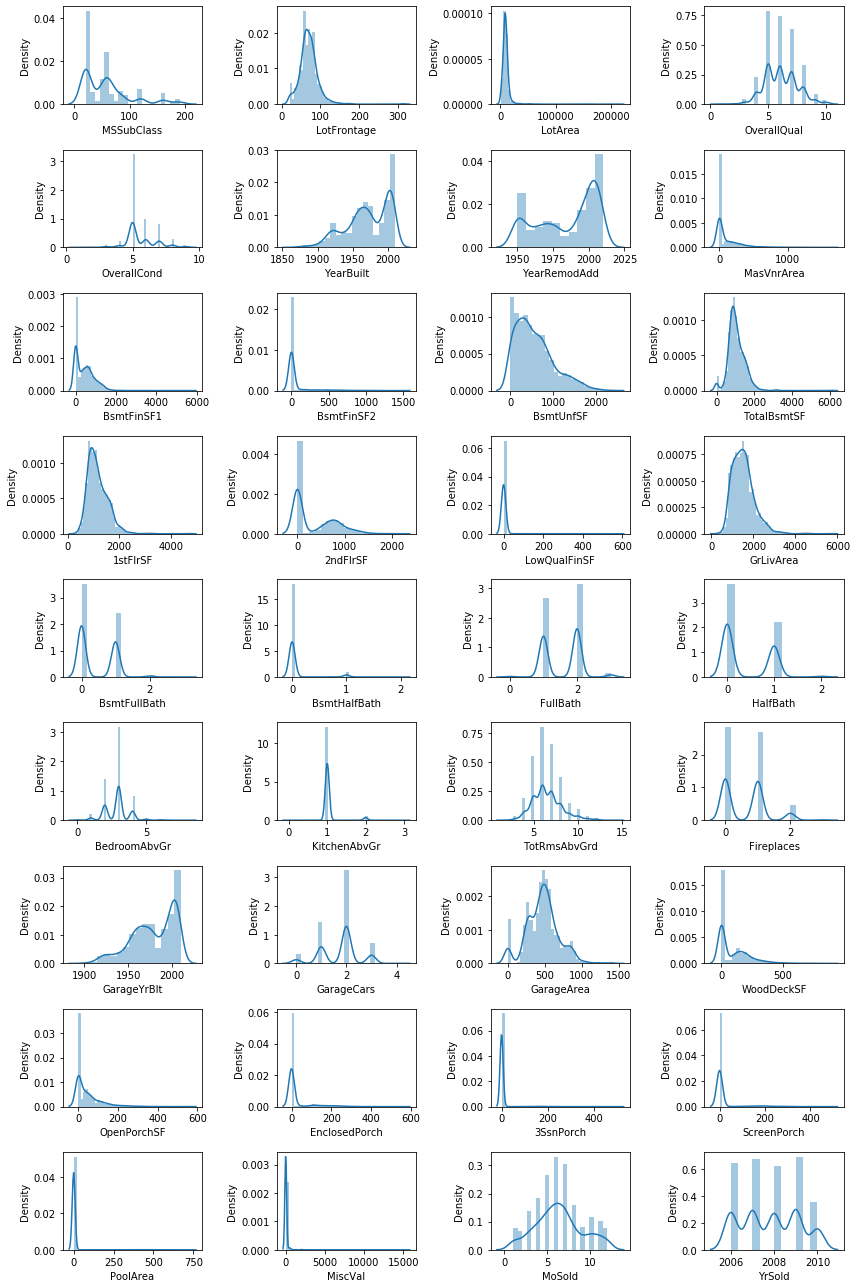

In [24]:
num_attributes = housing.select_dtypes(exclude='object').drop(['SalePrice', 'Id'], axis=1).copy()

fig = plt.figure(figsize=(12, 18))
for i, col in enumerate(num_attributes.columns): 
    fig.add_subplot(9, 4, i+1)
    sns.distplot(num_attributes[col].dropna())
    plt.xlabel(col)

plt.tight_layout()
plt.show()

* Some attributes are very skewed:  `LotArea`

### ScatterPlot by Color  

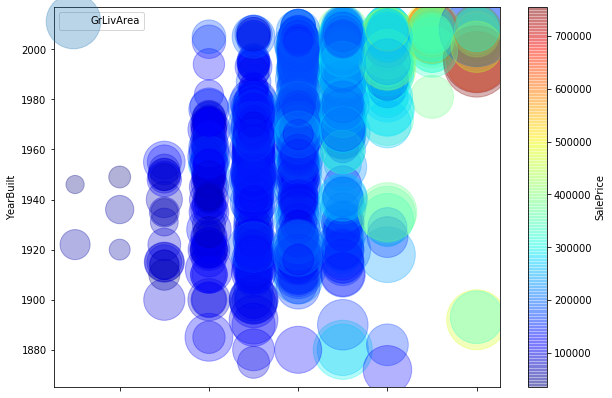

In [27]:
housing.plot(kind="scatter", x="OverallQual", y="YearBuilt",  s=housing["GrLivArea"], label="GrLivArea", 
             alpha=0.3, figsize=(10,7), c="SalePrice", cmap=plt.get_cmap("jet"), colorbar=True)

plt.legend()

### HeatMap

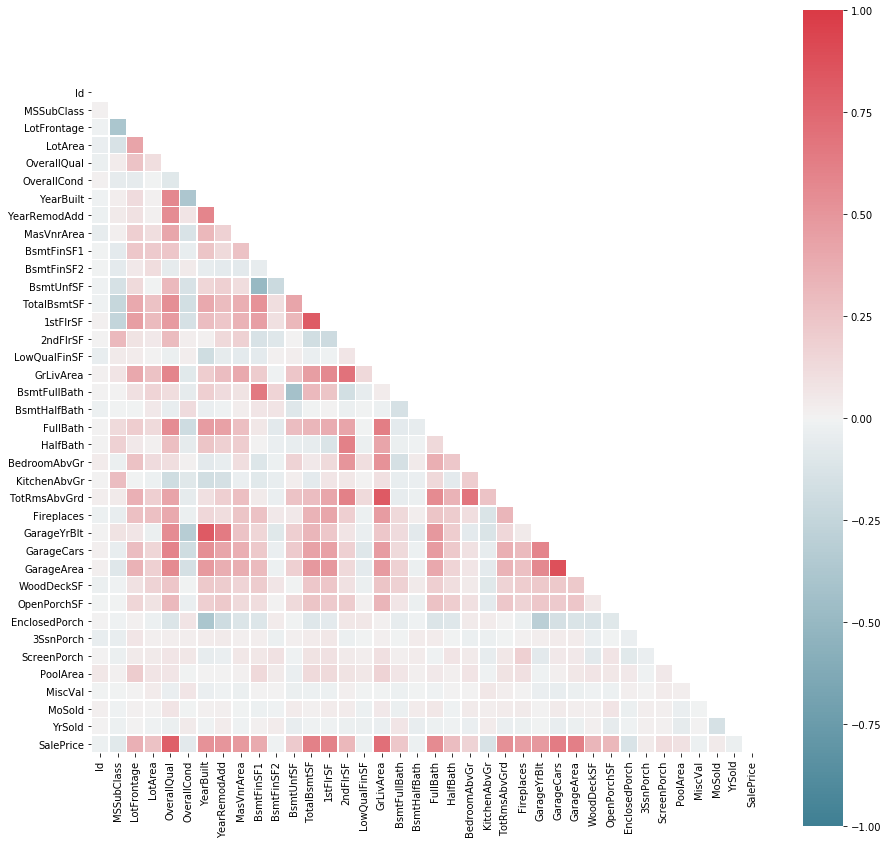

In [28]:
# Correlation of numerical attributes
corr = housing.corr()

# Using mask to get triangular correlation matrix
f, ax = plt.subplots(figsize=(15, 15))
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, mask=mask, cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True, ax=ax, vmin = -1.0, vmax = 1.0, linewidths=.5)

In [30]:
corr['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

In [77]:
attributes_drop = ['MiscVal', 'MoSold', 'YrSold', 'BsmtFinSF2','BsmtHalfBath', 'MSSubClass', '3SsnPorch']

In [ ]:
# Pairplots
# col = ['SalePrice', 'OverallQual', 'GrLivArea', 'YearBuilt']
#sns.pairplot(housing[col])

In [76]:
# Only important correlations and not auto-correlations
threshold = 0.5
important_corrs = (corr[abs(corr) > threshold][corr != 1.0]) \
    .unstack().dropna().to_dict()

unique_important_corrs = pd.DataFrame(
    list(set([(tuple(sorted(key)), important_corrs[key]) \
    for key in important_corrs])), columns=['attribute pair', 'correlation'])

# Sorted by absolute value
unique_important_corrs = unique_important_corrs.iloc[
    abs(unique_important_corrs['correlation']).argsort()[::-1]]

unique_important_corrs 

,attribute pair,correlation
20,"(GarageArea, GarageCars)",0.882475
13,"(GarageYrBlt, YearBuilt)",0.825667
26,"(GrLivArea, TotRmsAbvGrd)",0.825489
21,"(1stFlrSF, TotalBsmtSF)",0.819530
5,"(OverallQual, SalePrice)",0.790982
30,"(GrLivArea, SalePrice)",0.708624
36,"(2ndFlrSF, GrLivArea)",0.687501
12,"(BedroomAbvGr, TotRmsAbvGrd)",0.676620
33,"(BsmtFinSF1, BsmtFullBath)",0.649212
35,"(GarageYrBlt, YearRemodAdd)",0.642277


In [78]:
attributes_drop.append('GarageArea')
attributes_drop.append('GarageYrBlt')

### Categorical Feat Explore 

In [35]:
cat_columns = housing.select_dtypes(include='object').columns

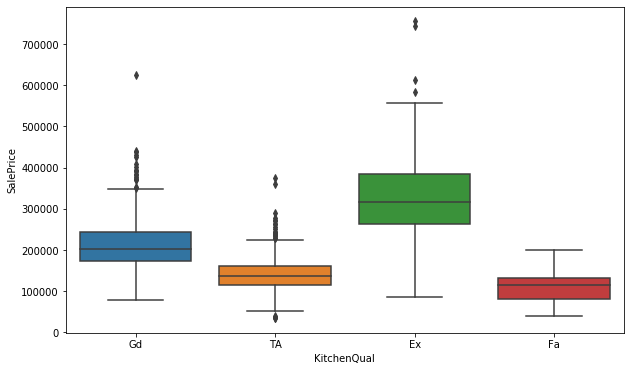

In [36]:
# plotting 1 particular feature
var = housing['KitchenQual']
f, ax = plt.subplots(figsize=(10,6))
sns.boxplot(y=housing.SalePrice, x=var)
plt.show()

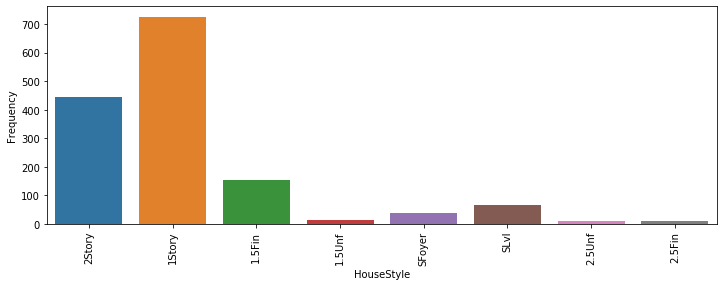

In [37]:
# Count of categories within HouseStyle attribute
fig = plt.figure(figsize=(12, 4))
sns.countplot(x='HouseStyle', data=housing)
plt.xticks(rotation=90)
plt.ylabel('Frequency')
plt.show()

## Data Preprocessing 

* Missing Values
* Outliers 
* (Highly) Correlated Attributes
* Text/Categorical Attr
* Feat Scaling 


### Missing Vals

In [40]:
housing.isnull().sum().sort_values(ascending=False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
LotFrontage       259
GarageYrBlt        81
GarageCond         81
GarageType         81
GarageFinish       81
GarageQual         81
BsmtFinType2       38
BsmtExposure       38
BsmtQual           37
BsmtCond           37
BsmtFinType1       37
MasVnrArea          8
MasVnrType          8
Electrical          1
Id                  0
Functional          0
Fireplaces          0
KitchenQual         0
KitchenAbvGr        0
BedroomAbvGr        0
HalfBath            0
FullBath            0
BsmtHalfBath        0
TotRmsAbvGrd        0
GarageCars          0
GrLivArea           0
GarageArea          0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
BsmtFullBath        0
HeatingQC 

In [65]:
housing_processed = housing

In [66]:
# categorical - fill w/ None 
# other options: most frequent value 

for cat in cat_columns:
    housing_processed[cat] = housing_processed[cat].fillna("None")

In [67]:
# Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
housing_processed['LotFrontage'] = housing_processed.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))  

In [46]:
pd.DataFrame.interpolate?

In [68]:
# Garage: GarageYrBlt, GarageArea and GarageCars these are numerical columns, replace with zero
for col in ['GarageYrBlt', 'GarageArea', 'GarageCars']:
    housing_processed[col] = housing_processed[col].fillna(int(0))

In [69]:
# MasVnrArea : replace with zero
housing_processed['MasVnrArea'] = housing_processed['MasVnrArea'].fillna(int(0))

# Use the mode value 
housing_processed['Electrical'] = housing_processed['Electrical'].fillna(housing_processed['Electrical']).mode()[0]


In [70]:
# verify no NAs
housing_processed.isnull().apply(sum).max()

0

### Outliers

remove outliers higher than .999 quantile 

In [71]:
high_quant = housing_processed.quantile(.999)

In [72]:
for col in num_attributes.columns:
    housing_processed.drop(housing_processed[housing_processed[col] > high_quant[col]].index, inplace=True)

In [73]:
housing_processed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1422 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1422 non-null   int64  
 1   MSSubClass     1422 non-null   int64  
 2   MSZoning       1422 non-null   object 
 3   LotFrontage    1422 non-null   float64
 4   LotArea        1422 non-null   int64  
 5   Street         1422 non-null   object 
 6   Alley          1422 non-null   object 
 7   LotShape       1422 non-null   object 
 8   LandContour    1422 non-null   object 
 9   Utilities      1422 non-null   object 
 10  LotConfig      1422 non-null   object 
 11  LandSlope      1422 non-null   object 
 12  Neighborhood   1422 non-null   object 
 13  Condition1     1422 non-null   object 
 14  Condition2     1422 non-null   object 
 15  BldgType       1422 non-null   object 
 16  HouseStyle     1422 non-null   object 
 17  OverallQual    1422 non-null   int64  
 18  OverallC

### Correlated Attr

Identified in EDA HeatMap,  `corr['SalePrice'].sort_values(ascending=False)` and pairwise correlations  

In [79]:
housing_processed = housing_processed.drop(attributes_drop, axis=1)

### Text and Categorical 

ML needs numbers; convert text and categories to numbers:

* One-hot encoding
* for text, get (external) embeddings

In [80]:
housing_processed.drop('Id', axis=1, inplace=True)

In [82]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_processed_1hot = cat_encoder.fit_transform(housing_processed)
housing_processed_1hot

<1422x7335 sparse matrix of type '<class 'numpy.float64'>'
	with 100962 stored elements in Compressed Sparse Row format>

### Feature Scaling

* min-max scaling `(x-x_min)/(x_max - x_min)`
* standardization/normalization  `(x - mu)/std` 

## Data Transformation 

In [83]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [84]:
# Separate features and target variable
housing_X = housing_processed.drop("SalePrice", axis=1)
housing_y = housing_processed["SalePrice"].copy()

# Get the list of names for numerical and categorical attributes separately
num_attributes = housing_X.select_dtypes(exclude='object')
cat_attributes = housing_X.select_dtypes(include='object')

num_attribs = list(num_attributes)
cat_attribs = list(cat_attributes)

In [210]:
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

In [214]:
SimpleImputer?

In [239]:
cat_pipeline = Pipeline([
     ('imputer', SimpleImputer(strategy='most_frequent')),
     ('onehot', OneHotEncoder(handle_unknown='ignore'))    
 ])

In [211]:
# full_pipeline = ColumnTransformer([
#         ("num", num_pipeline, num_attribs),
#         ("cat", OneHotEncoder(), cat_attribs),
#     ])

In [240]:
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", cat_pipeline, cat_attribs),
    ])

In [87]:
# Apply log-transform to SalePrice
housing_y_prepared  = np.log(housing_y)

In [108]:
def inv_y(y):
    return np.exp(y)

In [156]:
housing_X.shape

(1422, 70)

In [241]:
housing_X_prepared = full_pipeline.fit_transform(housing_X)

In [160]:
housing_X_prepared.shape

(1422, 283)

In [100]:
type(housing_X_prepared)

scipy.sparse.csr.csr_matrix

## ML 


In [121]:
from sklearn.model_selection import train_test_split
# regression models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
import xgboost
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [ ]:
# classification models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.ensemble.forest import RandomForestClassifier
from sklearn.ensemble.weight_boosting import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier

# classification metrics 
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import balanced_accuracy_score
# fancy plotting 
from IPython.display import display
from mlxtend.plotting import plot_decision_regions

In [104]:
X_train, X_val, y_train, y_val = train_test_split(housing_X_prepared, housing_y_prepared, test_size=0.2, random_state=7)

In [122]:
# scoring df 
scores_df = pd.DataFrame(columns=['Model', 'RMSE', 'acc'])

### LinReg

In [93]:
model = LinearRegression()

In [95]:
# ppln1 = Pipeline(steps=[('preprocessor', full_pipeline),
#                              ('model', model)
#                            ])

In [102]:
#ppln1.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                             

In [105]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
preds = model.predict(X_val)

In [125]:
# Evaluate the model
rmse = np.sqrt( mean_squared_error(inv_y(y_val), inv_y(preds)))
print('RMSE:', rmse)

RMSE: 24690.941655790884


In [124]:
scores_df.loc[scores_df.shape[0]] = ['linreg', rmse, model.score(X_val, y_val)]

### RandForest

In [116]:
rf_model = RandomForestRegressor(random_state=5)
rf_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=5, verbose=0, warm_start=False)

In [126]:
rf_val_predictions = rf_model.predict(X_val)
rf_val_rmse = mean_squared_error(inv_y(rf_val_predictions), inv_y(y_val))
rf_val_rmse = np.sqrt(rf_val_rmse)

scores_df.loc[scores_df.shape[0]] = ['RandomForest', rf_val_rmse, rf_model.score(X_test, y_test)*100]

In [127]:
scores_df

,Model,RMSE,acc
0,linreg,24690.941656,0.895409
1,RandomForest,30524.194168,86.356642


### Cross-Val

In [128]:
from sklearn.model_selection import cross_val_score

In [ ]:
from sklearn.model_selection import cross_validate
def cv(clf, train_X, train_y, scoring=['accuracy', 'balanced_accuracy' ,'precision', 'recall', 'f1', 'roc_auc']): 
    cv = cross_validate(clf, train_X, train_y, cv=5, return_estimator=True, scoring=scoring)
    
    output = {}
    for s in scoring: 
        m = np.mean(cv['test_' + s])
        v = np.var(cv['test_' + s])
        output[s] ={'mean': m, 'var': v}      
    return output

In [131]:
scores = cross_val_score(model, X_train, y_train,
                         scoring="neg_mean_squared_error", cv=5)

In [134]:
linreg_cv_rmse = np.sqrt(-scores) 

In [135]:
linreg_cv_rmse, linreg_cv_rmse.mean(), linreg_cv_rmse.std()

(array([0.1292933 , 0.11973738, 0.11531267, 0.11984926, 0.14044805]),
 0.12492813388257096,
 0.00900131742735263)

### Saving The Model

In [136]:
from sklearn.externals import joblib

## Hyperparam Tuning

* GridSearchCV
* RandomizedSearchCV
* Bayesian Optimization (? not in scikit learn)

In [137]:
from sklearn.model_selection import GridSearchCV

In [138]:
# Define the parameters for exploration
param_grid = [
    {'n_estimators': [10, 50, 100, 150], 'max_features': [10, 20, 30, 40, 50, 100, 150]},
    {'bootstrap': [False], 'n_estimators': [10, 50, 100, 150], 'max_features': [10, 20, 30, 40, 50, 100, 150]},
  ]

# The model for which we are finding params values
forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [139]:
# Best values
grid_search.best_params_

{'bootstrap': False, 'max_features': 50, 'n_estimators': 150}

In [140]:
# Model with best values
grid_search.best_estimator_

RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=50, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=150, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [141]:
rf_model_final = RandomForestRegressor(bootstrap=False,max_features=50, n_estimators=150, random_state=5)

rf_model_final.fit(X_train, y_train)
rf_final_val_predictions = rf_model_final.predict(X_val)

# Get RMSE 
rf_final_val_rmse = mean_squared_error(inv_y(rf_final_val_predictions), inv_y(y_val))
np.sqrt(rf_final_val_rmse)

29025.617434220912

In [143]:
scores_df.loc[scores_df.shape[0]] = ['RF-tuned', np.sqrt(rf_final_val_rmse), rf_model_final.score(X_val, y_val)*100]

## Predict on Test

In [144]:
!ls

FB-prep.ipynb         sample_submission.csv train.csv
House_prices.ipynb    submission1.csv
data_description.txt  test.csv


In [245]:
test_df = pd.read_csv('test.csv')

In [222]:
test_df.drop('Id', axis=1, inplace=True)

In [223]:
test_df.drop(attributes_drop, axis=1, inplace=True)

In [224]:
test_df.shape

(1459, 70)

In [226]:
test_processed = test_df.copy()

In [227]:
# Garage: GarageYrBlt, GarageArea and GarageCars these are numerical columns, replace with zero
for col in ['GarageCars']:
    test_processed[col] = test_processed[col].fillna(int(0))

# MasVnrArea : replace with zero
test_processed['MasVnrArea'] = test_processed['MasVnrArea'].fillna(int(0))

# Use the mode value 
test_processed['Electrical'] = test_processed['Electrical'].fillna(test_processed['Electrical']).mode()[0]

In [242]:
test_X = full_pipeline.transform(test_processed)

In [243]:
test_preds = model.predict(test_X)

In [244]:
pred_prices = np.exp(test_preds)

In [247]:
answ = pd.DataFrame()
answ['Id'] = test_df['Id']
answ['SalePrice'] = pred_prices
answ.to_csv('submission2.csv', index=False)